# "Sweet Insights: A Statistical Exploration of Apple Quality Using Python"


Attributes:
- A_id: Unique identifier for each fruit
- Size: Size of the fruit
- Weight: Weight of the fruit
- Sweetness: Degree of sweetness of the fruit
- Crunchiness: Texture indicating the crunchiness of the fruit
- Juiciness: Level of juiciness of the fruit
- Ripeness: Stage of ripeness of the fruit
- Acidity: Acidity level of the fruit
- Quality: Overall quality of the fruit

Data Source: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality



# Importing Library

In [91]:
!pip install pandas 



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
!pip install numpy


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:

!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset

In [96]:
data = pd.read_csv('apple_quality.csv')
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [98]:
#Convert Acidity to Numerical
data['Acidity'] = pd.to_numeric(data['Acidity'], errors='coerce')

# Drop rows with missing values
data = data.dropna()

# Display dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


In [99]:
data.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

# Statistical Summary

In [100]:
data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


#Descriptive Statistics

In [108]:
df = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness','Ripeness', 'Acidity']
ds = pd.DataFrame({
    'Mean': data[df].mean(),
    'Median': data[df].median(),
    'Mode': data[df].mode().iloc[0],
    'Standard Deviation': data[df].std(),
    'Variance': data[df].var(),
    'Skewness': data[df].skew(),
    'Kurtosis': data[df].kurt()

})

ds

,Mean,Median,Mode,Standard Deviation,Variance,Skewness,Kurtosis
Size,-0.503015,-0.513703,-7.151703,1.928059,3.717410,-0.002437,-0.083341
Weight,-0.989547,-0.984736,-7.149848,1.602507,2.568029,0.003102,0.359050
Sweetness,-0.470479,-0.504758,-6.894485,1.943441,3.776962,0.083850,0.014472
Crunchiness,0.985478,0.998249,-6.055058,1.402757,1.967728,0.000230,0.722020
Juiciness,0.512118,0.534219,-5.961897,1.930286,3.726003,-0.113421,0.028735
Ripeness,0.498277,0.503445,-5.864599,1.874427,3.513476,-0.008764,-0.071850
Acidity,0.076877,0.022609,-7.010538,2.110270,4.453238,0.055783,-0.093451


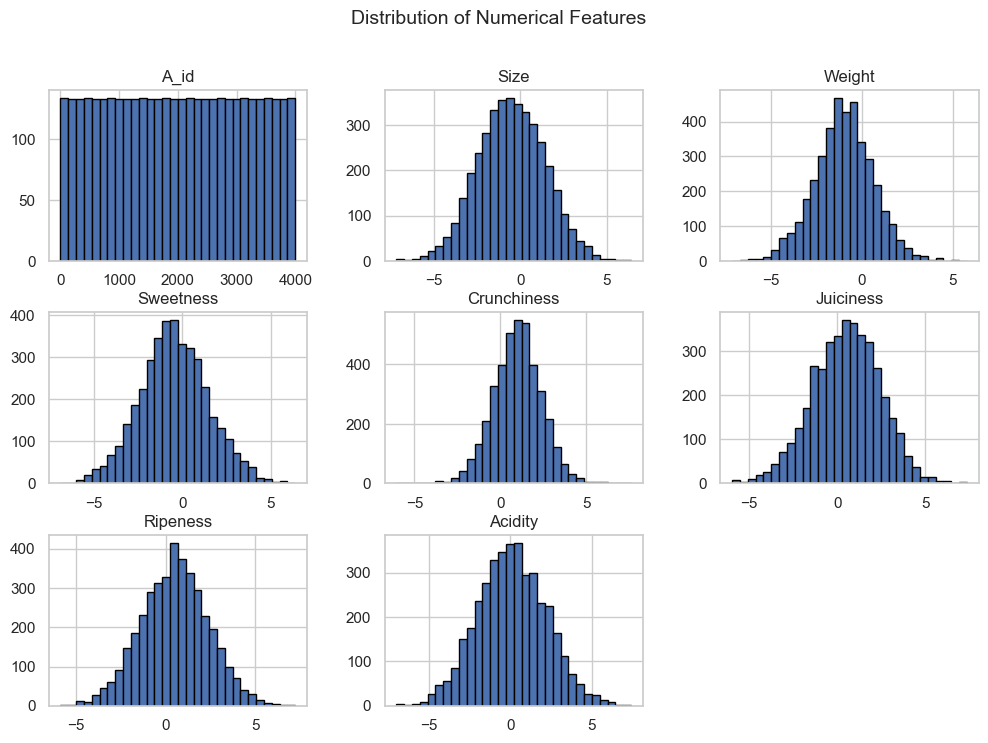

In [ ]:

# Set plot style
sns.set(style="whitegrid")

# Plot histograms for numerical variables
data.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

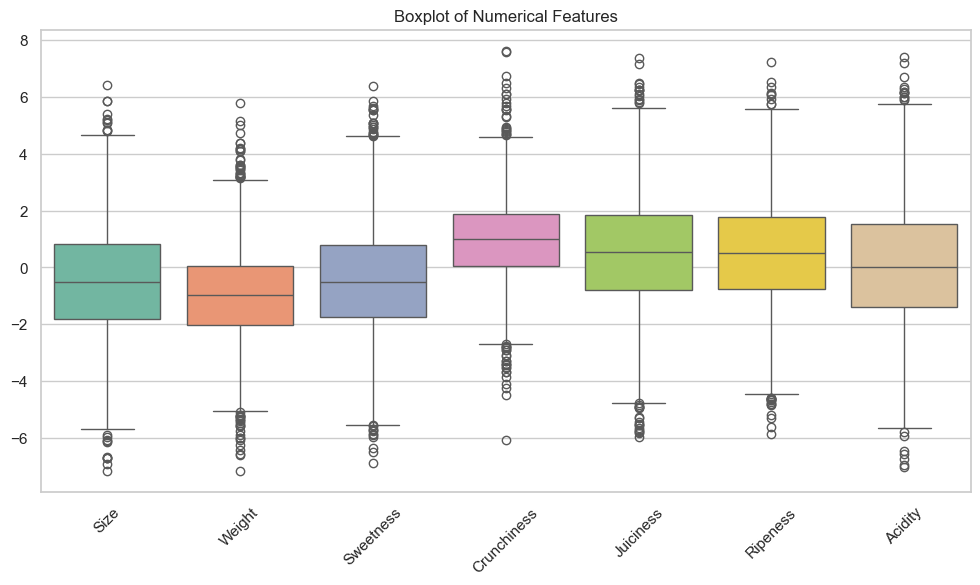

In [ ]:

# Box plots to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop(columns=["A_id"]), palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()

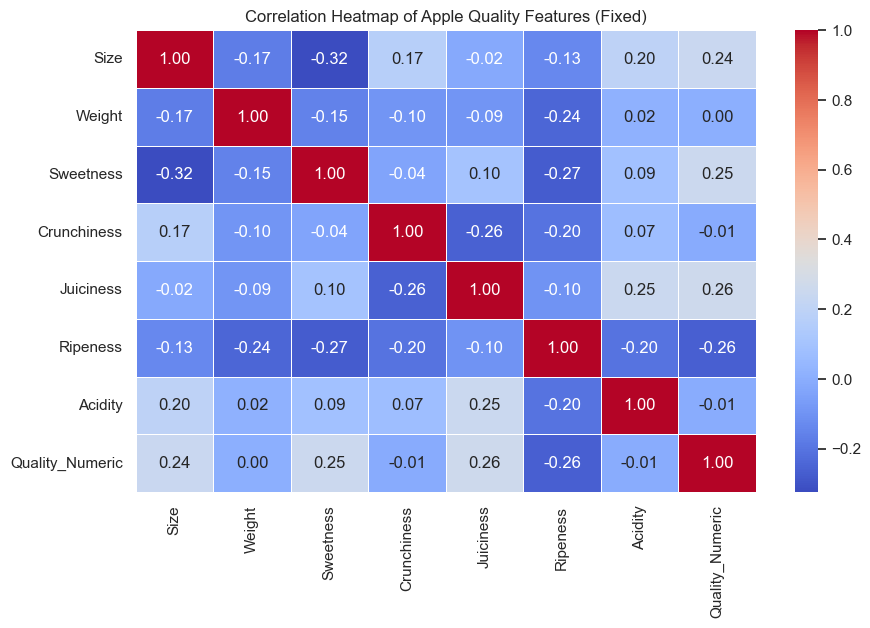

In [ ]:
# Convert Quality to numeric (good = 1, bad = 0) for correlation analysis
data["Quality_Numeric"] = data["Quality"].map({"good": 1, "bad": 0})

# Generate the correlation heatmap again
plt.figure(figsize=(10, 6))
sns.heatmap(data.drop(columns=["A_id", "Quality"]).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Apple Quality Features (Fixed)")
plt.show()

Quality
good    2004
bad     1996
Name: count, dtype: int64


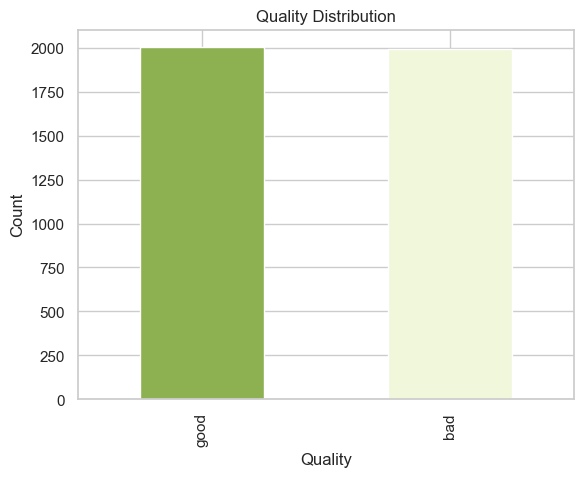

In [116]:
#Frequency Distribution of the Categorical Column

quality_counts = data['Quality'].value_counts()
print(quality_counts)

quality_counts.plot(kind='bar', title='Quality Distribution', color=['#8db051', '#f0f7da'])
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

C:\Users\alber\AppData\Local\Temp\ipykernel_17268\2922511490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Quality', y='Size', data=data, palette='Set2')


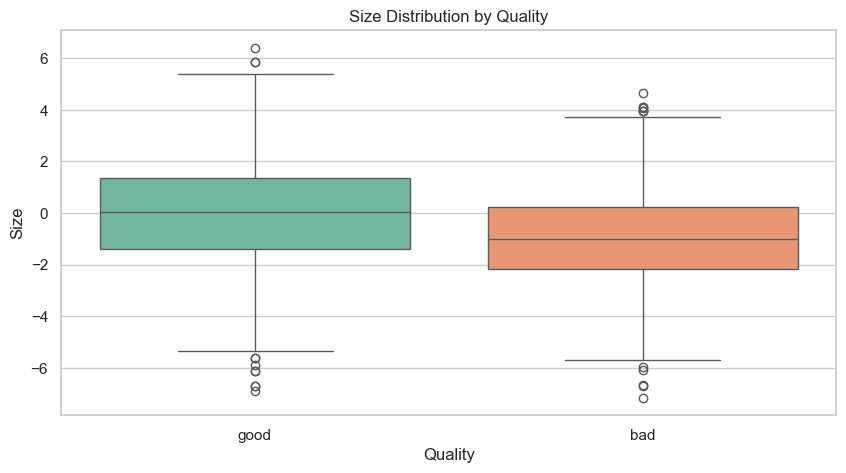

In [117]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Quality', y='Size', data=data, palette='Set2')
plt.title('Size Distribution by Quality')
plt.xlabel('Quality')
plt.ylabel('Size')
plt.show()